# Data Mining

## Tugas 4: Sistem Rekomendasi

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **tugas4_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi *dilarang keras* menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Terdapat enam *packages* yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- matplotlib
- numpy
- pandas
- scipy
- seaborn
- scikit-learn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini, kecuali dijelaskan sebaliknya. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda.

Pastikan jawaban Anda singkat, padat, dan jelas. Mayoritas pertanyaan yang diberikan dapat dijawab dalam 3-4 kalimat saja.

**1. Eksplorasi Dataset (/25 poin)**

1.1.a (/3 poin)

1.1.b (/2 poin)

1.2 (/2 poin)

1.3.a (/2 poin)

1.3.b (/2 poin)

1.4 (/3 poin)

1.5.a (/2 poin)

1.5.b (/2 poin)

1.6 (/2 poin)

1.7 (/5 poin)

**2. Prediksi Sederhana (/25 poin)**

2.1.a (/2 poin)

2.1.b (/2 poin)

2.2.a (/3 poin)

2.2.b (/3 poin)

2.3.a (/3 poin)

2.3.b (/3 poin)

2.4 (/3 poin)

2.5 (/5 poin)

**3. Collaborative Filtering (/30 poin)**

3.1 (/2 poin)

3.2.a (/2 poin)

3.2.b (/3 poin)

3.3 (/3 poin)

3.4.a (/3 poin)

3.4.b (/4 poin)

3.5 (/2 poin)

3.6 (/4 poin)

3.7 (/3 poin)

3.8 (/4 poin)

**4. UV-Decomposition (/20 poin)**

4.1.a (/2 poin)

4.1.b (/2 poin)

4.1.c (/2 poin)

4.1.d (/2 poin)

4.2.a (/4 poin)

4.2.b (/3 poin)

4.3 (/2 poin)

4.4 (/3 poin)

**NIM: **

**Nilai akhir: XX/100**

### Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

RANDOM_STATE = 538
plt.style.use('fivethirtyeight')

In [2]:
movies = pd.read_csv('../dataset/ml/movies.csv')
ratings = pd.read_csv('../dataset/ml/ratings.csv')
tags = pd.read_csv('../dataset/ml/tags.csv')

### Deskripsi Dataset

Dataset yang digunakan dalam tugas ini merupakan data peringkat (*ratings*) film dari situs MovieLens. Dalam dataset ini, terdapat 100,000 *ratings* and 1,300 *tag* yang diaplikasikan pada 9,000 film dari 700 pengguna. Dataset ini merupakan versi lebih ringkas dari keseluruhan data yang bisa mencapai 20 juta *ratings*.

*Rating* yang diberikan berskala 5-bintang, dengan kenaikan 0.5 bintang, i.e. 0.5, 1.0, 1.5, ..., 5.0 bintang.

Untuk tugas ini, dataset yang digunakan telah dibagi menjadi dua: data latih dan data uji. Tugas Anda adalah menghasilkan *mean squared error* (MSE) serendah mungkin dengan masing-masing metode yang digunakan. Gunakan pengetahuan yang telah Anda dapatkan dari materi dan tugas-tugas sebelumnya.

### Referensi

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=<http://dx.doi.org/10.1145/2827872>

Sumber: https://grouplens.org/datasets/movielens/

Beberapa konsep yang diterapkan dalam tugas ini dapat Anda lihat dalam buku Mining of Massive Datasets (Leskovec et al., 2014) pada Chapter 9.

## 1. Eksplorasi Dataset (25 poin)

Pada bagian ini, Anda diminta untuk melihat berbagai hal menarik dalam dataset yang digunakan. Gunakan visualisasi, laporkan statistiknya, dan gunakan beberapa metode sederhana untuk mengetahui karakteristik dari dataset yang digunakan!

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
import re

# Mengekstraksi tahun dengan menggunakan regular expression
movies['year'] = movies.title.apply(lambda x: re.findall('\([0-9]{4}\)', x)[0][1:5] if re.findall('\([0-9]{4}\)', x) else np.nan)

### Soal 1.1.a (3 poin)

Gunakan `MultiLabelBinarizer` untuk menghasilkan matriks berisi masing-masing *genre*.

*Petunjuk: Anda dapat mengolah string dalam `genres` dengan memisahkannya berdasarkan `|`, lalu mengaplikasikan `MultiLabelBinarizer`.*

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer

# Kode Anda di sini

### Soal 1.1.b (2 poin)

Ubah matriks tersebut ke dalam `DataFrame`, lalu gabungkan dengan variabel `movies` dan simpan sebagai `movies` kembali.

In [6]:
# Kode Anda di sini

### Soal 1.2 (2 poin)

Gambarkan bar plot yang menunjukkan jumlah film untuk tiap *genre*.

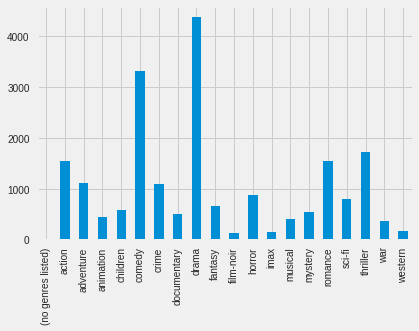

In [7]:
# Kode Anda di sini

### Soal 1.3.a (2 poin)

Periksa apakah ada film yang tidak mempunyai nilai tahun (`year = null`). Jika ada, buang dari dataset `movies`. Buang juga `ratings` yang mengandung `movieId` yang dibuang tersebut.

In [8]:
# Kode Anda di sini

### Soal 1.3.b (2 poin)

Gambarkan histogram yang menunjukkan frekuensi film per tahun.

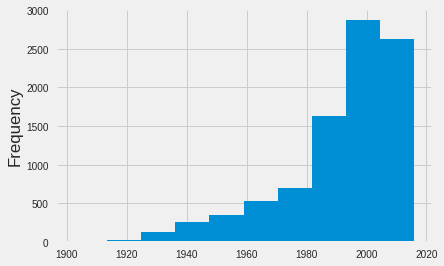

In [9]:
# Kode Anda di sini

### Soal 1.4 (3 poin)

Gambarkan *line plot* yang menunjukkan tren tiap *genre* per tahunnya. Ini dapat ditunjukkan dengan menggambarkan jumlah film dengan *genre* tersebut untuk tiap tahun.

*Petunjuk: Anda mungkin perlu mengubah ukuran gambarnya karena akan ada banyak sekali garis (i.e. sejumlah genre) dalam plot tersebut.*

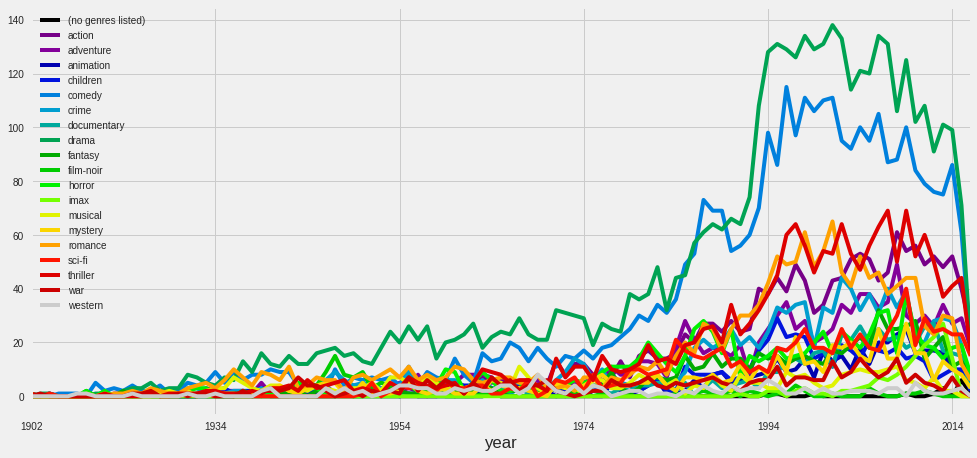

In [10]:
# Kode Anda di sini

### Soal 1.5.a (2 poin)

Sekarang, kita ingin melihat perilaku pengguna dalam memberikan peringkat untuk film. Pertama, ubahlah `timestamp` pada `ratings` menjadi format standar.

*Petunjuk: Anda mungkin perlu mengecek kembali apakah waktu yang dihasilkan sudah masuk akal atau belum.*

*Sanity check: Tahunnya seharusnya menunjukkan antara 1995-2015*

In [11]:
# Kode Anda di sini

### Soal 1.5.b (2 poin)

Gambarkan histogram yang menunjukkan frekuensi rating yang diberikan per tahun.

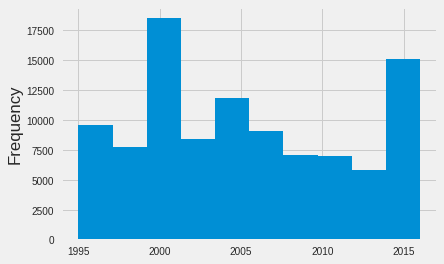

In [12]:
# Kode Anda di sini

### Soal 1.6 (2 poin)

Gambarkan histogram yang menunjukkan frekuensi bintang (`rating`) yang diberikan.

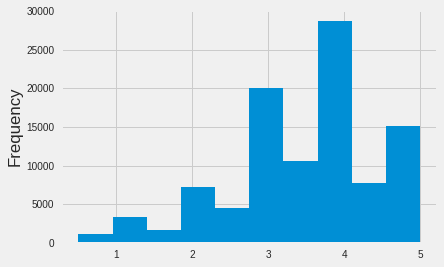

In [13]:
# Kode Anda di sini

### Soal 1.7 (5 poin)

Apa yang dapat Anda simpulkan dari hasil eksplorasi sejauh ini?

_Jawaban Anda di sini_

## 2. Prediksi Sederhana (25 poin)

Anda diminta untuk membuat prediksi *rating* dengan menggunakan beberapa metode sederhana, yaitu dengan pencarian rata-rata dan regresi.

### Soal 2.1.a (2 poin)

Bagi data `ratings` menjadi dua variabel: `train` dan `test`. Pastikan bahwa Anda melakukan pengacakan urutan data sebelum membaginya dan proporsi data `train`:`test` adalah 70:30.

*Catatan: Hanya dua variabel yang perlu dihasilkan, bukan `X_train`, `X_test`, `y_train`, `y_test` seperti di tugas-tugas sebelumnya.*

In [14]:
# Kode Anda di sini

### Soal 2.1.b (3 poin)

Buang semua data dalam `test` yang `movieId`-nya tidak ada dalam `train`. Mengapa kita melakukan hal ini?

In [15]:
# Kode Anda di sini

_Jawaban Anda di sini_

### Soal 2.2.a (3 poin)

Salah satu asumsi paling mendasar adalah kita dapat menggunakan rata-rata bintang yang diberikan oleh seorang pengguna untuk menebak jumlah bintang yang akan diberikan untuk film berikutnya yang dia tonton. Oleh karena itu, cari nilai rata-rata untuk *rating* berdasarkan `userId` dalam `train`. Lalu, gunakan nilai rata-rata tersebut untuk memprediksi *rating* yang akan diberikan oleh pengguna tersebut pada film-film yang akan ditontonnya pada `test`. Laporkan nilai MSE-nya.

In [16]:
from sklearn.metrics import mean_squared_error

# Kode Anda di sini

0.9332318017326694

### Soal 2.2.b (3 poin)

Asumsi lain yang dapat digunakan adalah: seorang pengguna akan memberikan bintang kepada suatu film seperti halnya orang-orang lain akan memberikannya pada film tersebut. Jadi, lakukan hal yang sama seperti pada soal 2.1.a, tetapi ambil nilai rata-rata dengan pengelompokan berdasarkan `movieId`. Laporkan nilai MSE-nya.

In [17]:
# Kode Anda di sini

0.98259182625529551

### Soal 2.3.a (3 poin)

Salah satu cara lain untuk memberikan sistem rekomendasi adalah dengan melakukan klasifikasi atau regresi. Dengan membuat model untuk tiap pengguna, maka Anda dapat memprediksi peringkat dengan melakukan klasifikasi atau regresi untuk film baru yang akan ditonton oleh pengguna tersebut.

Gabungkan (merge) `train` dan `movies` terlebih dahulu. Pastikan penggabungan digunakan secara `left join` dengan `train` sebagai tabel di sebelah kiri. Lalu, buatlah model regresi linear untuk tiap pengguna dan simpan model-model tersebut dalam *dictionary* dengan kunci `userId`. Gunakan *genre* sebagai fitur regresi linear tersebut.

*Petunjuk: Gunakan `.groupby()` untuk mendapatkan kelompok data berdasarkan `userId`, lalu gunakan for-loop untuk mengiterasi setiap group tersebut.*

In [18]:
from sklearn.linear_model import LinearRegression

# Kode Anda di sini

### Soal 2.3.b (3 poin)

Prediksi data `test` dengan menggunakan model yang telah dihasilkan pada soal 2.2.a. Lalu, laporkan MSE yang didapatkan.

*Petunjuk: Anda bisa menggunakan for-loop untuk group seperti pada soal sebelumnya **atau** Anda dapat memprediksi per satu kasus.*

In [19]:
# Kode Anda di sini

1.0997375902095352

### Soal 2.4 (3 poin)

Mengapa dalam kasus regresi atau klasifikasi untuk prediksi *rating* kita tidak menggunakan `movieId` atau `userId` sebagai fitur? Apa yang terjadi kalau kita menggunakan kedua atribut tersebut sebagai fitur?

_Jawaban Anda di sini_

### Soal 2.5 (5 poin)

Apa yang dapat Anda simpulkan dari hasil eksplorasi sejauh ini?

_Jawaban Anda di sini_

## 3. Collaborative Filtering (30 poin)

Sebagai perbandingan, Anda akan membuat prediksi peringkat dengan menggunakan metode *collaborative filtering*.

**Perhatian: Berhati-hatilah dengan bagian ini karena ada banyak manipulasi matriks yang mungkin diperlukan. Selalu lakukan *sanity check*. *Do not procrastinate*.**

### Soal 3.1 (2 poin)

Buat `X_train` dari hasil pivot `train` dengan menjadikan `userId` sebagai index, `movieId` sebagai kolom, dan `rating` menjadi nilai dari *cell*.

*Sanity check: Perintah ini seharusnya menghasilkan sparse matrix.*

In [20]:
# Kode Anda di sini

### Soal 3.2.a (2 poin)

Prediksi dengan *collaborative filtering* berdasarkan pengguna dapat dilakukan dengan menghitung *cosine similarity*. Nilai *similarity* tersebut kemudian akan dijadikan bobot untuk tiap peringkat yang akan dihasilkan alih-alih menggunakan k-rekomendasi terbaik.

Hitung nilai *cosine similarity* dari `X_train` dengan menggunakan fungsi dari `scikit-learn`. Lalu, simpanlah nilai *cosine similarity* tersebut.

*Cosine similarity* didefinisikan sebagai
$$
sim(u, u^{\prime}) = \cos(\theta) = \frac{\mathbf{r}_u \cdot \mathbf{r}_{u^{\prime}}}{\|\mathbf{r}_u\| \|\mathbf{r}_{u^{\prime}}\|}
$$
dengan $u$ adalah pengguna dan $r_u$ adalah peringkat yang diberikan oleh pengguna $u$ dalam bentuk vektor.

*Sanity check: Untuk similarity berdasarkan pengguna, pastikan matriks yang dihasilkan berukuran $U \times U$ dengan $U$ adalah jumlah pengguna dalam data.*

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

# Kode Anda di sini

### Soal 3.2.b (3 poin)

Munculkan nilai minimum, maksimum, dan rata-rata dari seluruh *cosine similarity* yang dihasilkan.

In [22]:
# Kode Anda di sini

0.0
1.0
0.0699009103109


### Soal 3.3 (3 poin)

Hasil prediksi untuk film yang belum ditonton yang kita simpan pada `test` dapat dihitung dengan

$$
\hat{r}_{ui} = \sum_{u^{\prime}} sim(u,u^{\prime}) r_{u^{\prime} i}
$$

Namun, peringkat ini masih perlu dinormalisasi lagi (mengapa?). Hasil prediksi dengan normalisasi menjadi

$$
\hat{r}_{ui} = \frac{\sum_{u^{\prime}} sim(u,u^{\prime}) r_{u^{\prime} i}}{\sum_{u^{\prime}} |sim(u,u^{\prime})|}
$$

Dengan menggunakan referensi [ini](http://blog.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/), coba hasilkan prediksi berdasarkan *similarity* dan `X_train` yang telah dibentuk di soal sebelumnya. Lalu, simpan hasilnya ke menjadi `DataFrame` sebagai variabel `X_pred`. Jangan lupa untuk mengisi parameter `index` dengan `X_train.index` dan `columns` dengan `X_train.columns`.

In [23]:
# Kode Anda di sini

### Soal 3.4.a (3 poin)

Prediksi peringkat di data `test` dari `X_pred` yang telah dihasilkan. Laporkan MSE-nya.

*Petunjuk: Anda dapat memanfaatkan `test.apply()` lalu menerapkan fungsi lambda yang mengambil prediksi untuk `userId` dan `movieId` tertentu dalam `X_pred`. Pastikan bahwa Anda mengambil rating yang benar dari matriks tersebut.*

In [24]:
# Kode Anda di sini

11.09615050453813

### Soal 3.4.b (4 poin)

Bandingkan MSE tersebut dengan hasil pada bagian 2. Apa yang dapat Anda lihat? Apa yang menyebabkan hasilnya seperti itu dibandingkan dengan metode yang telah dicobakan sebelumnya?

*Petunjuk: Anda mungkin perlu melihat isi matriks `X_pred`.*

_Jawaban Anda di sini_

### Soal 3.5 (2 poin)

Salah satu cara untuk memperbaiki hasilnya adalah dengan melakukan normalisasi bintang dengan mengurangi nilai bintang untuk film $i$ oleh pengguna $u$ dengan rata-rata bintang yang diberikan oleh pengguna $u$.

Terapkan proses normalisasi ini pada `X_train`, lalu simpan sebagai `X_normal`. Isi nilai kosong pada `X_normal` dengan 0.

*Petunjuk: Lihat kembali salindia kuliah sistem rekomendasi. Anda mungkin perlu melakukan matrix transpose beberapa kali karena bawaan operasi pada Pandas yang agak berbeda dengan NumPy.*

In [25]:
# Kode Anda di sini

### Soal 3.6 (4 poin)

Hitung nilai *cosine similarity* dari `X_normal`, lalu tampilkan nilai minimum, maksimum, dan rata-rata dari *similarity* yang dihasilkan.

In [26]:
# Kode Anda di sini

-0.469198049561
1.0
0.0120112449732


### Soal 3.7 (3 poin)

Prediksi kembali *rating* yang diberikan pada data `test`. Hitung nilai MSE-nya. Apakah hasilnya kali ini lebih baik?

In [27]:
# Kode Anda di sini

1.0512025192645498

### Soal 3.8 (4 poin)

Berikan kesimpulan yang dapat Anda ambil untuk sistem rekomendasi dengan menggunakan *collaborative filtering* ini.

_Jawaban Anda di sini_

## 4. UV-Decomposition (20 poin)

Metode lain yang dapat digunakan untuk melakukan prediksi adalah dengan menggunakan proses faktorisasi matriks. Dalam bagian ini, Anda akan melakukan UV-decomposition dengan *routine* yang telah disediakan oleh scikit-learn.

### Soal 4.1.a (2 poin)

Dengan menggunakan modul `NMF` untuk *non-negative matrix factorization* dengan `n_components=2`. Transformasi `X_train` dengan terlebih dahulu mengisi nilai kosong dengan 0, lalu simpan sebagai `X_transformed`.

In [28]:
from sklearn.decomposition import NMF

# Kode Anda di sini

### Soal 4.1.b (2 poin)

Ide dari UV-decomposition adalah menghasilkan matriks $U$ dan $V$ yang dimensinya jauh lebih kecil dibandingkan $X$. Dari matriks $U$ dan $V$ tersebut, kita akan melakukan inversi dari hasil transformasi untuk mendapatkan aproksimasi untuk nilai yang kosong.

Lakukan transformasi dan inversnya, kemudian simpan matriks ini sebagai `X_pred`. Jangan lupa untuk mengisi nilai `index` dan `columns` dari `DataFrame` yang dibentuk dengan `X_pred`.

In [29]:
# Kode Anda di sini

### Soal 4.1.c (2 poin)

Gunakan matriks `X_pred` untuk memprediksi *rating* pada data `test`. Lalu, laporkan MSE-nya.

In [30]:
# Kode Anda di sini

10.153268474883289

### Soal 4.1.d (2 poin)

Apakah MSE yang dihasilkan cukup bagus? Kita dapat mengonfirmasi ini dengan melihat nilai error pada aproksimasi yang dihasilkan. Cetak nilai ini dengan menggunakan `.reconstruction_err_`. Apa yang dapat Anda simpulkan dari nilai error ini?

In [31]:
# Kode Anda di sini

891.4454528706

_Jawaban Anda di sini_

### Soal 4.2.a (4 poin)

Coba hasilkan faktorisasi matriks dengan menggunakan jumlah komponen `n = [2, 5, 10, 25, 50, 100]`, lalu laporkan *reconstruction error*-nya dalam bentuk *line plot*.

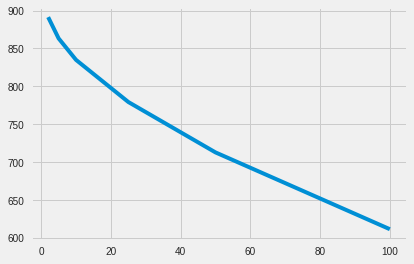

In [32]:
# Kode Anda di sini

### Soal 4.2.b (3 poin)

Anda akan melihat bahwa tren error rekonstruksinya selalu menurun seiring dengan bertambahnya jumlah komponen. Apakah dengan menggunakan $n = u$ errornya bisa mendekati nol? Jika bisa, apakah hasil prediksi untuk data `test` akan menjadi lebih baik, lalu apa yang menjadi masalahnya? Jika tidak, jelaskan mengapa hal tersebut tidak mungkin.

*Petunjuk: Anda mungkin bisa melihat perubahan hasil prediksi ketika $n$ ditambah.*

_Jawaban Anda di sini_

### Soal 4.3 (2 poin)

Apa yang mungkin perlu dilakukan agar hasil prediksi menggunakan UV-decomposition ini bisa lebih baik?

*Petunjuk: Anda bisa menggunakan referensi buku Mining of Massive Datasets (Leskovec et al., 2014) pada Section 9.4.*

_Jawaban Anda di sini_

### Soal 4.4 (3 poin)

Berikan kesimpulan Anda terkait sistem rekomendasi dengan menggunakan UV-decomposition ini.

_Jawaban Anda di sini_